In [2]:
from scipy.io import wavfile
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
sr, data = wavfile.read('bode.wav')

In [3]:
#showing dataset
data
data.shape

(418775, 2)

In [4]:
#removing blank before sweep, actually could be ignored
n = 1
while abs(data[n][0]) < 10:
    n = n+1
data = data[n:]
n = data.shape[0]
data.shape

(418774, 2)

In [8]:
#using scipy to convert sweep into complex signal form
w, h = signal.freqz(data[:,1], data[:,0])
x = w * sr * 1.0 / (2 * np.pi)
y = 20 * np.log10(abs(h))

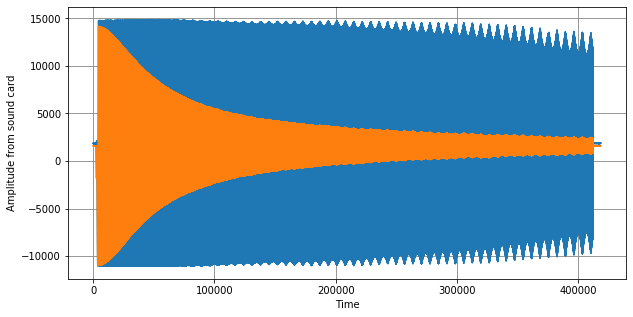

In [9]:
#plotting raw data
plt.figure(figsize=(10, 5))
plt.plot(data)
plt.title("")
plt.xlabel("Time")
plt.ylabel("Amplitude from sound card")
plt.grid(which='both', linestyle='-', color='grey')

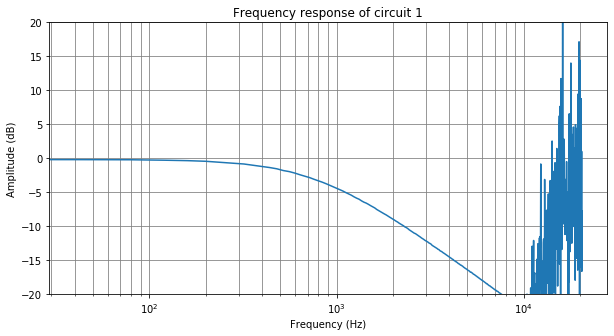

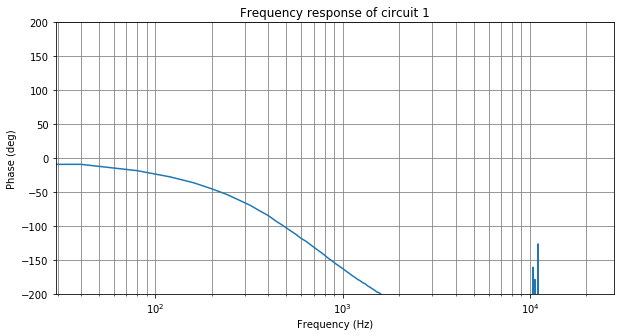

In [7]:
#plotting amplitude
plt.figure(1, figsize=(10, 5))
plt.semilogx(x,y)
plt.ylim([-20,20]) #limiting y-axis for 
plt.title("Frequency response of circuit 1")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.grid(which='both', linestyle='-', color='grey')

#plotting phase shift
angles = np.unwrap(np.angle(h))
plt.figure(2, figsize=(10, 5))
plt.semilogx(x,angles*180)
plt.ylim([-200,200])
plt.title("Frequency response of circuit 1")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase (deg)")
plt.grid(which='both', linestyle='-', color='grey')